In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

number_first_singles = 128;

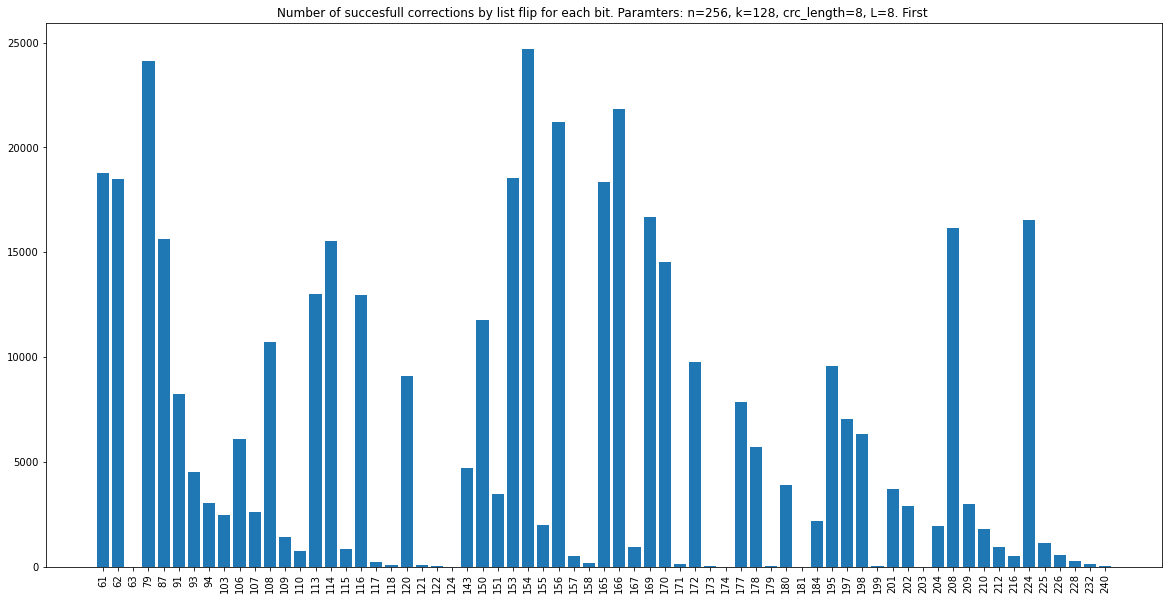

In [2]:
# oracle stat
filename = "..//results//OracleStats//256_error_count_distr.stat"
with open(filename, 'r') as infile:
    stat = infile.read()

single_pattern = "\((\d{1,3})\): (\d{1,10})";
compiled_re = re.compile(single_pattern)
result = compiled_re.findall(stat)

#result = result[:number_first_singles]
single_result_lists = [list(t) for t in zip(*result)]
positions = list(map(int, single_result_lists[0]))
single_freq = list(map(int, single_result_lists[1]))

positions_ind = [i for i, _ in enumerate(positions)]

plt.figure(figsize=(20,10))
plt.bar(positions_ind, single_freq)
plt.xticks(positions_ind, positions, rotation='vertical')
plt.title("Number of succesfull corrections by list flip for each bit. Paramters: n=256, k=128, crc_length=8, L=8. First ")

plt.savefig("SingleLisFlip.png");



In [3]:
paired_pattern = "\((\d{1,3}), (\d{1,3})\): (\d{1,10})";
compiled_re = re.compile(paired_pattern)
result_pair = compiled_re.findall(stat)

sorted_pairs = sorted(result_pair, key=lambda tup: int(tup[2]), reverse=True)

for p in sorted_pairs:
    print("({}, {}): {}".format(p[0], p[1], p[2]))

(61, 62): 2354
(153, 154): 1572
(165, 166): 1414
(154, 156): 1405
(153, 156): 1396
(61, 79): 1304
(79, 87): 1067
(165, 169): 1012
(113, 114): 926
(113, 116): 864
(150, 153): 858
(150, 154): 829
(208, 224): 812
(169, 170): 807
(169, 172): 753
(166, 170): 750
(154, 165): 731
(106, 108): 714
(62, 79): 707
(154, 166): 702
(153, 165): 684
(166, 169): 672
(113, 120): 659
(108, 113): 657
(108, 114): 628
(114, 116): 627
(154, 155): 602
(150, 156): 593
(61, 87): 583
(79, 91): 581
(153, 166): 575
(166, 172): 561
(87, 91): 544
(114, 120): 542
(154, 169): 522
(165, 170): 521
(156, 166): 520
(106, 113): 511
(156, 165): 503
(79, 108): 498
(150, 151): 469
(153, 169): 459
(195, 208): 451
(208, 209): 450
(195, 224): 449
(165, 172): 443
(156, 169): 440
(165, 177): 439
(154, 170): 436
(169, 177): 433
(62, 87): 427
(106, 114): 427
(108, 116): 415
(150, 166): 412
(154, 208): 400
(150, 165): 389
(197, 208): 385
(166, 178): 383
(166, 167): 381
(197, 224): 380
(79, 154): 369
(114, 154): 360
(166, 195): 360
(8

In [4]:
sorted_single_result = sorted(result, key=lambda tup: int(tup[1]), reverse=True)

single_result_not_null = list(filter(lambda x: x[1] != '0', sorted_single_result))
single_result_not_null_lists = [list(t) for t in zip(*single_result_not_null)]
positions = list(map(int, single_result_not_null_lists[0]))

print(positions)

for p in sorted_single_result:
    print("({}): {}".format(p[0], p[1]))

[154, 79, 166, 156, 61, 153, 62, 165, 169, 224, 208, 87, 114, 170, 113, 116, 150, 108, 172, 195, 120, 91, 177, 197, 198, 106, 178, 143, 93, 180, 201, 151, 94, 209, 202, 107, 103, 184, 155, 204, 210, 109, 225, 212, 167, 115, 110, 226, 216, 157, 228, 117, 158, 232, 171, 118, 121, 240, 199, 179, 122, 173, 124, 63, 174, 203, 181]
(154): 24698
(79): 24140
(166): 21844
(156): 21228
(61): 18799
(153): 18528
(62): 18478
(165): 18328
(169): 16677
(224): 16543
(208): 16178
(87): 15626
(114): 15547
(170): 14552
(113): 13027
(116): 12957
(150): 11767
(108): 10726
(172): 9780
(195): 9562
(120): 9119
(91): 8226
(177): 7844
(197): 7062
(198): 6306
(106): 6081
(178): 5731
(143): 4717
(93): 4513
(180): 3884
(201): 3684
(151): 3473
(94): 3039
(209): 3002
(202): 2897
(107): 2602
(103): 2463
(184): 2167
(155): 1966
(204): 1939
(210): 1802
(109): 1403
(225): 1117
(212): 945
(167): 943
(115): 822
(110): 759
(226): 563
(216): 530
(157): 493
(228): 294
(117): 244
(158): 164
(232): 151
(171): 142
(118): 96
(12

In [6]:
sorted_pairs = sorted(result_pair, key=lambda tup: int(tup[2]), reverse=True)
pair_result_not_null = list(filter(lambda x: x[2] != '0', sorted_pairs))

pairs = list(map(lambda x: "{" + x[0] + ", " + x[1] + "},", pair_result_not_null))
for p in pairs[:40]:
    print(p)

{61, 62},
{153, 154},
{165, 166},
{154, 156},
{153, 156},
{61, 79},
{79, 87},
{165, 169},
{113, 114},
{113, 116},
{150, 153},
{150, 154},
{208, 224},
{169, 170},
{169, 172},
{166, 170},
{154, 165},
{106, 108},
{62, 79},
{154, 166},
{153, 165},
{166, 169},
{113, 120},
{108, 113},
{108, 114},
{114, 116},
{154, 155},
{150, 156},
{61, 87},
{79, 91},
{153, 166},
{166, 172},
{87, 91},
{114, 120},
{154, 169},
{165, 170},
{156, 166},
{106, 113},
{156, 165},
{79, 108},


In [7]:
triplets_pattern = "\((\d{1,3}), (\d{1,3}), (\d{1,3})\): (\d{1,10})";
compiled_re = re.compile(triplets_pattern)
result_triplets = compiled_re.findall(stat)

sorted_triplets = sorted(result_triplets, key=lambda tup: int(tup[3]), reverse=True)

for p in sorted_triplets:
    print("({}, {}, {}): {}".format(p[0], p[1], p[2], p[3]))

(61, 62, 63): 403
(61, 62, 79): 222
(153, 154, 156): 185
(150, 153, 154): 135
(153, 154, 155): 127
(165, 166, 169): 111
(113, 114, 116): 104
(113, 114, 120): 99
(61, 62, 87): 96
(150, 154, 156): 93
(150, 153, 156): 92
(165, 166, 167): 91
(165, 166, 170): 86
(150, 151, 154): 79
(106, 108, 113): 78
(61, 79, 87): 77
(154, 165, 166): 75
(153, 154, 166): 74
(165, 169, 172): 73
(153, 154, 165): 71
(165, 169, 170): 71
(113, 114, 115): 68
(79, 87, 91): 66
(153, 156, 165): 65
(153, 165, 169): 65
(165, 166, 172): 63
(153, 165, 166): 60
(150, 165, 166): 59
(154, 156, 166): 59
(106, 108, 114): 58
(108, 113, 114): 58
(150, 153, 165): 55
(166, 169, 172): 53
(79, 106, 108): 52
(153, 156, 157): 52
(108, 113, 116): 51
(61, 62, 154): 50
(106, 113, 116): 50
(79, 87, 108): 49
(106, 113, 114): 49
(169, 170, 172): 49
(153, 154, 169): 48
(153, 156, 166): 48
(166, 169, 170): 48
(106, 108, 109): 47
(154, 156, 165): 47
(165, 166, 177): 47
(87, 113, 114): 46
(61, 62, 114): 45
(154, 156, 158): 45
(166, 170, 172):

(150, 154, 172): 10
(150, 154, 198): 10
(150, 166, 167): 10
(150, 169, 172): 10
(150, 208, 210): 10
(151, 154, 165): 10
(153, 166, 208): 10
(153, 169, 178): 10
(153, 177, 195): 10
(153, 197, 201): 10
(154, 156, 204): 10
(154, 165, 167): 10
(154, 166, 180): 10
(154, 169, 184): 10
(154, 170, 184): 10
(154, 170, 195): 10
(154, 177, 180): 10
(154, 177, 208): 10
(156, 166, 208): 10
(156, 169, 208): 10
(156, 170, 224): 10
(156, 172, 208): 10
(156, 197, 208): 10
(156, 208, 212): 10
(165, 172, 208): 10
(165, 177, 178): 10
(165, 208, 209): 10
(166, 169, 198): 10
(166, 172, 195): 10
(166, 177, 208): 10
(169, 172, 178): 10
(169, 177, 178): 10
(169, 208, 209): 10
(170, 172, 224): 10
(170, 177, 184): 10
(170, 178, 184): 10
(170, 195, 201): 10
(170, 195, 224): 10
(195, 197, 201): 10
(197, 198, 199): 10
(197, 198, 202): 10
(197, 201, 224): 10
(202, 208, 224): 10
(61, 62, 151): 9
(61, 79, 103): 9
(61, 79, 224): 9
(61, 87, 166): 9
(61, 106, 107): 9
(61, 108, 120): 9
(61, 113, 153): 9
(61, 153, 166): 9


(114, 150, 170): 7
(114, 150, 201): 7
(114, 150, 208): 7
(114, 156, 208): 7
(114, 165, 178): 7
(114, 165, 197): 7
(114, 166, 224): 7
(114, 197, 198): 7
(114, 208, 224): 7
(116, 150, 165): 7
(116, 150, 166): 7
(116, 153, 166): 7
(116, 154, 170): 7
(116, 154, 208): 7
(116, 156, 169): 7
(116, 165, 172): 7
(116, 165, 177): 7
(116, 198, 224): 7
(120, 154, 155): 7
(120, 195, 224): 7
(143, 151, 154): 7
(143, 166, 167): 7
(143, 166, 195): 7
(150, 151, 177): 7
(150, 153, 209): 7
(150, 165, 167): 7
(150, 165, 172): 7
(150, 165, 208): 7
(150, 166, 177): 7
(150, 169, 177): 7
(150, 169, 197): 7
(151, 166, 195): 7
(153, 154, 201): 7
(153, 154, 210): 7
(153, 156, 178): 7
(153, 156, 180): 7
(153, 169, 197): 7
(153, 195, 201): 7
(153, 201, 208): 7
(154, 155, 157): 7
(154, 155, 172): 7
(154, 156, 184): 7
(154, 156, 224): 7
(154, 169, 197): 7
(154, 170, 208): 7
(154, 195, 198): 7
(154, 208, 212): 7
(156, 157, 169): 7
(156, 157, 170): 7
(156, 157, 197): 7
(156, 166, 197): 7
(156, 166, 198): 7
(156, 169, 1

(91, 108, 109): 4
(91, 108, 165): 4
(91, 108, 170): 4
(91, 113, 115): 4
(91, 113, 154): 4
(91, 114, 156): 4
(91, 114, 178): 4
(91, 143, 165): 4
(91, 150, 154): 4
(91, 150, 169): 4
(91, 150, 170): 4
(91, 151, 156): 4
(91, 165, 208): 4
(91, 166, 170): 4
(91, 166, 195): 4
(91, 169, 170): 4
(91, 195, 197): 4
(91, 195, 209): 4
(93, 94, 95): 4
(93, 94, 156): 4
(93, 103, 114): 4
(93, 108, 114): 4
(93, 108, 150): 4
(93, 113, 170): 4
(93, 114, 150): 4
(93, 116, 165): 4
(93, 143, 156): 4
(93, 143, 169): 4
(93, 150, 154): 4
(93, 153, 208): 4
(94, 113, 114): 4
(94, 116, 154): 4
(94, 153, 156): 4
(94, 154, 156): 4
(94, 156, 208): 4
(103, 107, 109): 4
(103, 107, 143): 4
(103, 107, 165): 4
(103, 107, 166): 4
(103, 108, 150): 4
(103, 108, 166): 4
(103, 113, 165): 4
(103, 114, 150): 4
(103, 114, 154): 4
(103, 116, 150): 4
(103, 116, 153): 4
(103, 116, 166): 4
(103, 143, 170): 4
(103, 150, 154): 4
(103, 169, 170): 4
(106, 107, 165): 4
(106, 107, 178): 4
(106, 107, 197): 4
(106, 108, 178): 4
(106, 108, 1

(150, 201, 202): 3
(150, 208, 216): 3
(150, 224, 226): 3
(151, 153, 157): 3
(151, 153, 166): 3
(151, 153, 170): 3
(151, 154, 197): 3
(151, 156, 169): 3
(151, 156, 170): 3
(151, 156, 172): 3
(151, 156, 224): 3
(151, 165, 197): 3
(151, 165, 208): 3
(151, 165, 224): 3
(151, 166, 167): 3
(151, 166, 170): 3
(151, 166, 202): 3
(151, 169, 170): 3
(151, 170, 178): 3
(151, 195, 208): 3
(151, 197, 208): 3
(151, 208, 209): 3
(151, 208, 210): 3
(151, 208, 212): 3
(151, 208, 224): 3
(153, 155, 195): 3
(153, 156, 184): 3
(153, 156, 202): 3
(153, 156, 204): 3
(153, 157, 202): 3
(153, 166, 198): 3
(153, 166, 202): 3
(153, 166, 204): 3
(153, 166, 209): 3
(153, 169, 204): 3
(153, 170, 172): 3
(153, 170, 197): 3
(153, 170, 201): 3
(153, 170, 208): 3
(153, 170, 209): 3
(153, 172, 197): 3
(153, 177, 201): 3
(153, 177, 208): 3
(153, 178, 197): 3
(153, 208, 225): 3
(153, 224, 225): 3
(154, 155, 184): 3
(154, 155, 201): 3
(154, 155, 202): 3
(154, 157, 177): 3
(154, 157, 208): 3
(154, 165, 202): 3
(154, 165, 2

(93, 150, 195): 2
(93, 150, 209): 2
(93, 151, 154): 2
(93, 153, 155): 2
(93, 153, 180): 2
(93, 153, 195): 2
(93, 153, 224): 2
(93, 154, 166): 2
(93, 154, 197): 2
(93, 156, 166): 2
(93, 156, 170): 2
(93, 156, 197): 2
(93, 156, 208): 2
(93, 165, 172): 2
(93, 166, 167): 2
(93, 166, 169): 2
(93, 166, 170): 2
(93, 166, 177): 2
(93, 166, 202): 2
(93, 166, 212): 2
(93, 169, 170): 2
(93, 169, 172): 2
(93, 169, 195): 2
(93, 170, 208): 2
(93, 177, 178): 2
(93, 177, 184): 2
(93, 178, 224): 2
(93, 195, 202): 2
(93, 197, 201): 2
(93, 198, 202): 2
(93, 198, 224): 2
(93, 202, 208): 2
(93, 202, 224): 2
(93, 208, 210): 2
(93, 208, 212): 2
(94, 106, 116): 2
(94, 106, 143): 2
(94, 106, 154): 2
(94, 107, 114): 2
(94, 108, 109): 2
(94, 108, 114): 2
(94, 108, 116): 2
(94, 108, 143): 2
(94, 108, 150): 2
(94, 108, 165): 2
(94, 113, 151): 2
(94, 113, 154): 2
(94, 113, 156): 2
(94, 113, 166): 2
(94, 114, 115): 2
(94, 114, 143): 2
(94, 114, 156): 2
(94, 114, 197): 2
(94, 116, 120): 2
(94, 116, 208): 2
(94, 116, 

(156, 170, 212): 2
(156, 172, 178): 2
(156, 172, 197): 2
(156, 172, 201): 2
(156, 172, 202): 2
(156, 172, 224): 2
(156, 177, 201): 2
(156, 177, 208): 2
(156, 177, 212): 2
(156, 178, 197): 2
(156, 178, 198): 2
(156, 180, 212): 2
(156, 180, 224): 2
(156, 184, 208): 2
(156, 195, 210): 2
(156, 197, 210): 2
(156, 197, 212): 2
(156, 198, 202): 2
(156, 198, 210): 2
(156, 201, 204): 2
(156, 202, 210): 2
(156, 204, 212): 2
(156, 204, 224): 2
(165, 166, 184): 2
(165, 166, 212): 2
(165, 167, 180): 2
(165, 167, 198): 2
(165, 169, 210): 2
(165, 169, 226): 2
(165, 169, 228): 2
(165, 170, 173): 2
(165, 170, 209): 2
(165, 172, 198): 2
(165, 172, 201): 2
(165, 172, 202): 2
(165, 172, 209): 2
(165, 172, 212): 2
(165, 177, 201): 2
(165, 177, 204): 2
(165, 177, 228): 2
(165, 178, 179): 2
(165, 178, 180): 2
(165, 178, 195): 2
(165, 180, 208): 2
(165, 195, 204): 2
(165, 198, 201): 2
(165, 198, 225): 2
(165, 198, 228): 2
(165, 201, 204): 2
(165, 201, 209): 2
(165, 201, 224): 2
(165, 202, 210): 2
(165, 208, 2

(91, 110, 153): 1
(91, 110, 197): 1
(91, 113, 166): 1
(91, 113, 177): 1
(91, 113, 178): 1
(91, 113, 202): 1
(91, 113, 208): 1
(91, 114, 118): 1
(91, 114, 151): 1
(91, 114, 172): 1
(91, 114, 177): 1
(91, 114, 202): 1
(91, 114, 204): 1
(91, 114, 225): 1
(91, 115, 116): 1
(91, 115, 120): 1
(91, 115, 121): 1
(91, 115, 154): 1
(91, 116, 124): 1
(91, 116, 151): 1
(91, 116, 178): 1
(91, 116, 201): 1
(91, 116, 208): 1
(91, 116, 224): 1
(91, 117, 208): 1
(91, 120, 121): 1
(91, 120, 150): 1
(91, 120, 165): 1
(91, 120, 170): 1
(91, 120, 172): 1
(91, 120, 177): 1
(91, 120, 197): 1
(91, 120, 198): 1
(91, 120, 201): 1
(91, 120, 202): 1
(91, 120, 216): 1
(91, 143, 150): 1
(91, 143, 166): 1
(91, 143, 195): 1
(91, 143, 197): 1
(91, 143, 198): 1
(91, 143, 201): 1
(91, 143, 202): 1
(91, 150, 155): 1
(91, 150, 177): 1
(91, 150, 208): 1
(91, 150, 209): 1
(91, 150, 212): 1
(91, 151, 155): 1
(91, 151, 157): 1
(91, 151, 177): 1
(91, 151, 202): 1
(91, 151, 208): 1
(91, 151, 224): 1
(91, 153, 201): 1
(91, 153, 

(103, 150, 156): 1
(103, 150, 172): 1
(103, 150, 177): 1
(103, 150, 210): 1
(103, 150, 224): 1
(103, 151, 153): 1
(103, 151, 154): 1
(103, 151, 165): 1
(103, 151, 177): 1
(103, 151, 208): 1
(103, 153, 155): 1
(103, 153, 166): 1
(103, 153, 171): 1
(103, 153, 177): 1
(103, 153, 178): 1
(103, 153, 197): 1
(103, 153, 202): 1
(103, 153, 209): 1
(103, 153, 226): 1
(103, 154, 165): 1
(103, 154, 166): 1
(103, 154, 169): 1
(103, 154, 170): 1
(103, 154, 172): 1
(103, 154, 195): 1
(103, 154, 208): 1
(103, 154, 212): 1
(103, 155, 156): 1
(103, 156, 158): 1
(103, 156, 170): 1
(103, 156, 195): 1
(103, 156, 198): 1
(103, 165, 170): 1
(103, 165, 177): 1
(103, 165, 195): 1
(103, 165, 224): 1
(103, 166, 167): 1
(103, 166, 169): 1
(103, 166, 178): 1
(103, 166, 180): 1
(103, 166, 197): 1
(103, 166, 198): 1
(103, 166, 209): 1
(103, 170, 177): 1
(103, 170, 198): 1
(103, 170, 208): 1
(103, 172, 173): 1
(103, 172, 209): 1
(103, 172, 225): 1
(103, 177, 180): 1
(103, 195, 198): 1
(103, 195, 224): 1
(103, 197, 1

(109, 120, 172): 1
(109, 120, 198): 1
(109, 120, 199): 1
(109, 120, 210): 1
(109, 120, 224): 1
(109, 121, 184): 1
(109, 143, 150): 1
(109, 143, 165): 1
(109, 143, 198): 1
(109, 143, 202): 1
(109, 143, 210): 1
(109, 150, 154): 1
(109, 150, 165): 1
(109, 150, 166): 1
(109, 150, 170): 1
(109, 150, 195): 1
(109, 151, 201): 1
(109, 153, 166): 1
(109, 153, 201): 1
(109, 154, 165): 1
(109, 154, 169): 1
(109, 154, 195): 1
(109, 154, 197): 1
(109, 154, 224): 1
(109, 156, 166): 1
(109, 156, 177): 1
(109, 156, 178): 1
(109, 156, 180): 1
(109, 156, 197): 1
(109, 156, 208): 1
(109, 157, 195): 1
(109, 165, 166): 1
(109, 165, 170): 1
(109, 165, 212): 1
(109, 165, 224): 1
(109, 166, 167): 1
(109, 166, 177): 1
(109, 166, 178): 1
(109, 166, 184): 1
(109, 166, 198): 1
(109, 166, 202): 1
(109, 166, 224): 1
(109, 167, 224): 1
(109, 169, 172): 1
(109, 169, 177): 1
(109, 169, 180): 1
(109, 169, 197): 1
(109, 170, 178): 1
(109, 172, 195): 1
(109, 172, 224): 1
(109, 195, 198): 1
(109, 195, 199): 1
(109, 195, 2

(154, 178, 179): 1
(154, 178, 182): 1
(154, 178, 210): 1
(154, 180, 202): 1
(154, 180, 209): 1
(154, 180, 224): 1
(154, 184, 202): 1
(154, 184, 204): 1
(154, 184, 216): 1
(154, 195, 204): 1
(154, 195, 212): 1
(154, 195, 225): 1
(154, 197, 199): 1
(154, 197, 212): 1
(154, 197, 225): 1
(154, 201, 209): 1
(154, 201, 216): 1
(154, 201, 225): 1
(154, 202, 216): 1
(154, 209, 224): 1
(154, 224, 240): 1
(155, 156, 158): 1
(155, 156, 169): 1
(155, 156, 172): 1
(155, 156, 177): 1
(155, 156, 195): 1
(155, 156, 201): 1
(155, 156, 208): 1
(155, 157, 201): 1
(155, 157, 208): 1
(155, 165, 166): 1
(155, 165, 169): 1
(155, 165, 170): 1
(155, 165, 172): 1
(155, 165, 195): 1
(155, 165, 224): 1
(155, 166, 170): 1
(155, 166, 180): 1
(155, 166, 195): 1
(155, 166, 202): 1
(155, 166, 224): 1
(155, 167, 177): 1
(155, 169, 170): 1
(155, 169, 180): 1
(155, 169, 184): 1
(155, 169, 204): 1
(155, 169, 209): 1
(155, 169, 224): 1
(155, 170, 195): 1
(155, 170, 201): 1
(155, 170, 202): 1
(155, 170, 216): 1
(155, 170, 2

(180, 197, 199): 1
(180, 197, 201): 1
(180, 197, 209): 1
(180, 197, 210): 1
(180, 198, 202): 1
(180, 198, 208): 1
(180, 198, 209): 1
(180, 198, 210): 1
(180, 201, 202): 1
(180, 202, 224): 1
(180, 204, 208): 1
(180, 208, 212): 1
(180, 208, 225): 1
(180, 209, 224): 1
(180, 212, 240): 1
(180, 224, 228): 1
(184, 186, 226): 1
(184, 197, 208): 1
(184, 197, 224): 1
(184, 201, 208): 1
(184, 201, 224): 1
(184, 202, 209): 1
(184, 204, 225): 1
(184, 208, 225): 1
(184, 210, 224): 1
(184, 224, 240): 1
(195, 197, 199): 1
(195, 197, 204): 1
(195, 197, 212): 1
(195, 197, 226): 1
(195, 198, 216): 1
(195, 198, 225): 1
(195, 198, 226): 1
(195, 198, 228): 1
(195, 199, 224): 1
(195, 201, 203): 1
(195, 201, 216): 1
(195, 202, 212): 1
(195, 202, 216): 1
(195, 202, 225): 1
(195, 202, 226): 1
(195, 204, 212): 1
(195, 209, 211): 1
(195, 209, 225): 1
(195, 210, 224): 1
(195, 210, 226): 1
(195, 224, 232): 1
(195, 224, 240): 1
(197, 198, 226): 1
(197, 198, 228): 1
(197, 199, 208): 1
(197, 201, 212): 1
(197, 201, 2